# Filling in blanks

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import glob

In [64]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [65]:
def count(dataframe):
    print(np.logical_not(dataframe.isnull()).sum()[0])

### Load SCADA operational data

In [66]:
def load_data(path):
    df = pd.read_csv(path,sep = ';')
    return df

In [67]:
# Loop through all csv files in folder and add them to list:
path = './DataFromBazefield/scada_data_bessaker/'
allFiles = glob.glob(path + "/*.csv")

list_of_wt_scada_data = []
for file_ in allFiles:
    df = load_data(file_)
    list_of_wt_scada_data.append(df)

list_of_wt_scada_data[0]    

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-Average blade angle across A B C (Average),BESS-WTG01-WindDirection (Average)
0,15-07-2017 00:00:00,NaN,4.5,9.75,227.0,109.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN
1,15-07-2017 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15-07-2017 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15-07-2017 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15-07-2017 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15-07-2017 00:02:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15-07-2017 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,15-07-2017 00:03:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,15-07-2017 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,15-07-2017 00:04:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
list_of_wt_scada_data[0].head()

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-Average blade angle across A B C (Average),BESS-WTG01-WindDirection (Average)
0,15-07-2017 00:00:00,NaN,4.5,9.75,227.0,109.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN
1,15-07-2017 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15-07-2017 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15-07-2017 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15-07-2017 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Slice each dataframe on the data where there is data

In [69]:
# This dataset is a dataset for a SINGLE wind turbine:

# Slice dataset on this row nr.: 177228 (4-09-2017 12:54:00)
#df.iloc[[177228]]

def slice_df(list_of_dataframes):
    i = 0
    for dataframe in list_of_dataframes:
        
        location = np.where(dataframe["TimeStamp"].str.contains("25-09-2017 13:20:00"))
        print(location)
        split_on_index = location[0][0]
        print(split_on_index)

        # Splitting
        df1 = dataframe.iloc[:split_on_index, :]
        df2 = dataframe.iloc[split_on_index:, :]

        # Reseting index
        df2 = df2.reset_index(drop=True)
        list_of_dataframes[i] = df2
        i+=1
        
    return list_of_dataframes

In [70]:
list_of_wt_scada_data = slice_df(list_of_wt_scada_data)
list_of_wt_scada_data[0].head()

(array([208960]),)
208960


,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-Average blade angle across A B C (Average),BESS-WTG01-WindDirection (Average)
0,25-09-2017 13:20:00,18.5,5.1,13.27,123.0,311.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.500000
1,25-09-2017 13:20:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-09-2017 13:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25-09-2017 13:21:30,16.9,NaN,12.95,124.0,276.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.899994
4,25-09-2017 13:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Find index of first value in a column that is not NaN:

In [75]:
# Find the first non-NaN value in a column
def find_first_not_nan(df,column_name):
    ser = df[column_name].notnull()
    length = ser.shape[0]

    for i in range (length):
        if (ser[i] == True):
            return i
    return "no values in column!"

## Loop through all columns in the dataset and put in the first not NaN number



In [97]:
# Looping all columns in dataframe
def loop_through_and_fill_first_val(data):
    for col in data.columns:
        index = find_first_not_nan(data,col)

        if (index != 0):
          # Put the value at the found index at the first index:
            data.at[0, col] = data.at[index, col]
        
        # Dropping columns if the first value is too far in the data set
        if (index > 200):
            data.drop([col], axis=1,inplace = True)
    return data

In [100]:
i = 0
for dataframe in list_of_wt_scada_data:
    dataframe = loop_through_and_fill_first_val(dataframe)
    list_of_wt_scada_data[i] = dataframe

In [101]:
list_of_wt_scada_data[0].head()

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-NacelleControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-WindDirection (Average)
0,25-09-2017 13:20:00,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,36.0,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000
1,25-09-2017 13:20:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-09-2017 13:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,46.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25-09-2017 13:21:30,16.9,NaN,12.95,124.0,276.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.899994
4,25-09-2017 13:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filling all missing values

In [102]:
def fill_missing_values(dataframe):
    # Filling in the missing values:
    dataframe.fillna(method='ffill', inplace=True)
    return dataframe

In [103]:
i = 0
for dataframe in list_of_wt_scada_data:
    dataframe = fill_missing_values(dataframe)
    list_of_wt_scada_data[i] = dataframe
    i += 1
list_of_wt_scada_data[0].head()

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-NacelleControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-WindDirection (Average)
0,25-09-2017 13:20:00,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,36.0,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000
1,25-09-2017 13:20:30,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,36.0,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000
2,25-09-2017 13:21:00,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,36.0,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000
3,25-09-2017 13:21:30,16.9,5.1,12.95,124.0,276.0,31.0,41.0,37.0,39.0,...,36.0,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,140.899994
4,25-09-2017 13:22:00,16.9,5.1,12.95,124.0,276.0,31.0,41.0,37.0,39.0,...,36.0,47.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,140.899994


# The Error log

### Reading the data for WT01

In [104]:
df_log = pd.read_excel('./DataFromBazefield/AlarmlogBessaker.xlsx')

#### Splitting the error log into each WT

In [105]:
def split_errors_on_wt(error_log):
    individual_turbine_alarm = {}
    for i in range(25):
        if(i+1 < 10):
            individual_turbine_alarm[i+1] = error_log.loc[error_log['Turbine'] == 'BESS-WTG0{0}'.format(i+1)]
        else :
            individual_turbine_alarm[i+1] = error_log.loc[error_log['Turbine'] == 'BESS-WTG{0}'.format(i+1)]

        individual_turbine_alarm[i+1] = individual_turbine_alarm[i+1].reset_index(drop=True)
    return individual_turbine_alarm

In [106]:
error_dict = split_errors_on_wt(df_log)

# List with 25 elements containing the dataframe of each of the 25 wind turbines at Bessaker
error_list = [*error_dict.values()]
len(error_list)

25

### Removing errors older than 25-09-2017

In [107]:
from datetime import date

for error_df in error_list:
    error_df["Start"] = pd.to_datetime(error_df['Start'])
    error_df.head()
    error_df = error_df[(error_df.Start >= date(2017, 9, 25))]

error_list[0].head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
0,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2019-10-06 14:56:33,2019-10-06 15:06:51,00:10:18,Alarm,NaN
1,Bessaker,BESS-WTG01,Status_240_Substatus_0,240:0,A,R 240:0 STATUS: Remote control PC (switched on),2019-10-02 12:26:37,2019-10-02 12:26:43,00:00:06,Alarm,NaN
2,Bessaker,BESS-WTG01,Status_240_Substatus_1,240:1,A,R 240:1 STATUS: Remote control PC (switched off),2019-10-02 12:24:29,2019-10-02 12:26:37,00:02:08,Alarm,NaN
3,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2019-10-02 10:01:04,2019-10-02 10:06:16,00:05:12,Alarm,NaN
4,Bessaker,BESS-WTG01,Status_17_Substatus_0,0.708333,A,N 17:0 Test safety system - (Test safety sys...,2019-10-02 10:00:04,2019-10-02 10:01:04,00:01:00,Alarm,NaN


### Formatting the dates in the error data

In [108]:
# What I have: format='%Y-%m-%d %H:%M:%S').
# What I want: '%d-%m-%Y %H:%M:%S'

def format_dates(dataframe):
    dataframe['Start'] = pd.to_datetime(dataframe['Start'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
    dataframe['End'] = pd.to_datetime(dataframe['End'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
    return dataframe

In [109]:
wt = 0
for error_df in error_list:
    error_df = format_dates(error_df)
    wt += 1
error_list[3].head()

,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
0,Bessaker,BESS-WTG04,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),06-10-2019 19:08:30,06-10-2019 20:28:48,01:20:18,Alarm,
1,Bessaker,BESS-WTG04,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),06-10-2019 14:54:17,06-10-2019 15:12:16,00:17:59,Alarm,NaN
2,Bessaker,BESS-WTG04,Status_240_Substatus_0,240:0,A,R 240:0 STATUS: Remote control PC (switched on),02-10-2019 12:26:37,02-10-2019 12:26:44,00:00:07,Alarm,NaN
3,Bessaker,BESS-WTG04,Status_240_Substatus_1,240:1,A,R 240:1 STATUS: Remote control PC (switched off),02-10-2019 12:24:29,02-10-2019 12:26:37,00:02:08,Alarm,NaN
4,Bessaker,BESS-WTG04,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),30-09-2019 15:06:49,30-09-2019 15:43:58,00:37:09,Alarm,NaN


### Filtering the wanted errors

In [110]:
'''
Error descriptions:

    "Status_9_Substatus_8" = Generator heating - (Manual)
    "Status_62_Substatus_7" = Feeding fault - (Diff. P-set/P-actual)
    "Status_15_Substatus_1" = Turbine moist - (Turbine moist Inverter 1)
    "Status_62_Substatus_30" = Feeding fault - (Feeding safety circuit faulty)
 
    '''
selected_errors = [
    "Status_9_Substatus_8",
    "Status_62_Substatus_7",
    "Status_62_Substatus_30"
]

def remove_unnecessary_faults(dataframe):
    new_df = pd.DataFrame(columns=dataframe.columns)

    for fault in selected_errors:
        new_df = new_df.append(dataframe[ dataframe["Alarm"] == fault])
    return new_df

j = 0
for error_df in error_list:
    error_df = remove_unnecessary_faults(error_df)
    error_df.sort_values(by=['Start'], inplace = True)
    error_df.reset_index(drop=True)
    error_list[j] = error_df
    j+=1

### Plotting the frequency of the chosen faults for Bessaker WT 1-25

In [111]:
# Empty dataframe
import numpy as np
plot_df = pd.DataFrame(np.zeros((25, len(selected_errors))),columns = selected_errors)

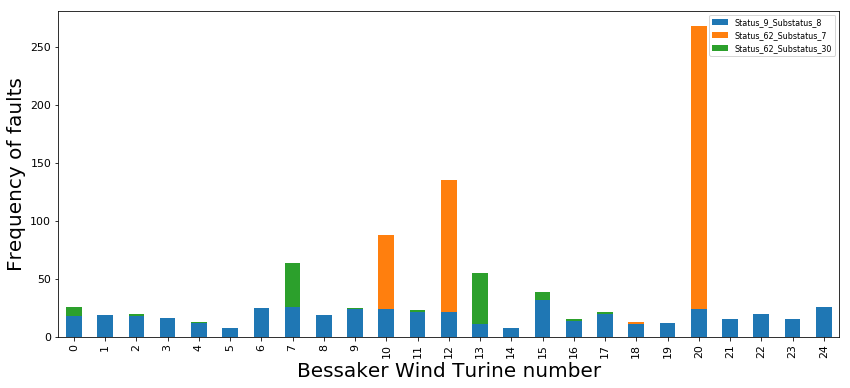

In [112]:
import matplotlib.pyplot as plt

# Filling in the count for the faults for every of the 25 WT
index = 0
for error_df in error_list:
    ser = error_df["Alarm"].value_counts()
    for i in range(len(ser.index)):
        col = ser.index[i]
        plot_df.at[index,col] = ser.values[i]
    index += 1
    
plot_df.astype(int)

# plotting 
fig, ax = plt.subplots(1, 1, figsize=(14,6))
ax.set_xlabel("Bessaker Wind Turine number",fontsize=20)
ax.set_ylabel("Frequency of faults",fontsize=20)

plt.tick_params(axis='y')
plot_df.plot.bar(ax=ax,width=0.5,stacked = True,fontsize = 11)

### Rounding the error log timestamps to match with the SCADA time stamps

In [113]:
from datetime import datetime, timedelta

def ceil_dt(dt, delta):
    return dt + (datetime.min - dt) % delta

def floor_dt(dt):
    return dt.replace(second = 0)


# For flooring starting times for an error
def floor_timestamp_start(timestamp_error_start):
    timestamp_error_start = datetime.strptime(timestamp_error_start,'%d-%m-%Y %H:%M:%S')

    # print("timestamp_error:", timestamp_error_start)
    
    timestamp_error_start = floor_dt(timestamp_error_start)
    return timestamp_error_start
    
# For ceiling ending times for an error UP
def ceil_timestamp_end(timestamp_error_end):
    timestamp_error_end = datetime.strptime(timestamp_error_end,'%d-%m-%Y %H:%M:%S')

    # print("timestamp_error:", timestamp_error_end)

    timestamp_error_end = ceil_dt(timestamp_error_end,timedelta(seconds = 30))
    return timestamp_error_end


In [114]:
start_time = error_list[0]['Start'].iloc[24]
end_time = error_list[0]['End'].iloc[24]
print(start_time)
print(end_time)

29-01-2018 09:42:34
29-01-2018 14:38:04


In [115]:
floor_timestamp_start(start_time)
print(start_time)

29-01-2018 09:42:34


In [116]:
ceil = ceil_timestamp_end(end_time)
print(ceil)

2018-01-29 14:38:30


### Round the errors times in error_list:


In [117]:
for error_df in error_list:
    error_df['Start'] = error_df['Start'].apply(lambda x:floor_timestamp_start(x))
    error_df['End'] = error_df['End'].apply(lambda x: ceil_timestamp_end(x))

    error_df['Start'] = pd.to_datetime(error_df['Start'], format='%d-%m-%Y %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
    error_df['End'] = pd.to_datetime(error_df['End'], format='%d-%m-%Y %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
error_list[24].head()

,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
146,Bessaker,BESS-WTG25,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),05-07-2019 17:02:00,05-07-2019 21:19:30,04:16:51,Alarm,NaN
92,Bessaker,BESS-WTG25,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),09-08-2019 17:20:00,09-08-2019 18:07:30,00:47:07,Alarm,NaN
463,Bessaker,BESS-WTG25,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),14-12-2018 22:41:00,15-12-2018 02:30:30,03:48:38,Alarm,NaN
301,Bessaker,BESS-WTG25,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),15-02-2019 13:11:00,15-02-2019 21:14:00,08:02:43,Alarm,NaN
211,Bessaker,BESS-WTG25,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),15-05-2019 04:09:00,15-05-2019 08:17:30,04:07:38,Alarm,NaN


### Inserting new column with "Other" as value in SCADA dataset

In [118]:
i = 0
for dataframe in list_of_wt_scada_data:
    dataframe['Status'] = "Other"
    list_of_wt_scada_data[i] = dataframe
list_of_wt_scada_data[0].head()

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-WindDirection (Average),Status
0,25-09-2017 13:20:00,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000,Other
1,25-09-2017 13:20:30,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000,Other
2,25-09-2017 13:21:00,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000,Other
3,25-09-2017 13:21:30,16.9,5.1,12.95,124.0,276.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,140.899994,Other
4,25-09-2017 13:22:00,16.9,5.1,12.95,124.0,276.0,31.0,41.0,37.0,39.0,...,47.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,140.899994,Other


### Alarm list for WT01:

In [119]:
error_list[0]["Alarm"]

7        Status_9_Substatus_8
6      Status_62_Substatus_30
408    Status_62_Substatus_30
595    Status_62_Substatus_30
645      Status_9_Substatus_8
509      Status_9_Substatus_8
271      Status_9_Substatus_8
269      Status_9_Substatus_8
267      Status_9_Substatus_8
585    Status_62_Substatus_30
583    Status_62_Substatus_30
160      Status_9_Substatus_8
265      Status_9_Substatus_8
263      Status_9_Substatus_8
546    Status_62_Substatus_30
245      Status_9_Substatus_8
420      Status_9_Substatus_8
113      Status_9_Substatus_8
216      Status_9_Substatus_8
314    Status_62_Substatus_30
42     Status_62_Substatus_30
29       Status_9_Substatus_8
57       Status_9_Substatus_8
278      Status_9_Substatus_8
565      Status_9_Substatus_8
562      Status_9_Substatus_8
Name: Alarm, dtype: object

### Filling in labels from the error data to the SCADA data

In [120]:
def fill_in_labels_in_SCADA(df_scada, df_error_log):
    # Looping through the errors in the error_log
    for j in range(df_error_log.shape[0]):
        
        # The error information:
        start = df_error_log.iloc[j]["Start"]
        end = df_error_log.iloc[j]["End"]
        label = df_error_log.iloc[j]["Alarm"]
        print(label)
        
        start_index_for_error_in_SCADA = df_scada.index[df_scada['TimeStamp'] == start].tolist()[0]
        end_index_for_error_in_SCADA = df_scada.index[df_scada['TimeStamp'] == end].tolist()[0]

        count = 0
        # Filling in labels for data points in range
        for i in range(start_index_for_error_in_SCADA, end_index_for_error_in_SCADA + 1 ):
            count +=1
            df_scada.at[i,'Status'] = label
        print("Number of datapoints changed in the SCADA data: ", count)
    return df_scada

In [121]:
# Filling in all labels in the SCADA data:
wt_index = 0
for dataframe in list_of_wt_scada_data:
    df_log = error_list[wt_index]
    dataframe = fill_in_labels_in_SCADA(dataframe, df_log)
    wt_index += 1

Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  734
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  3
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  2
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  2
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  765
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  128
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  191
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  463
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  326
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  4
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  2
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  490
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  226
Status_9_Substatus_8
Number of datapoi

In [125]:
for dataframe in list_of_wt_scada_data:
    print(dataframe.columns[1].split('-')[1],"Unique Errors : ", dataframe['Status'].unique())
    print("::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")

WTG01 Unique Errors :  ['Other' 'Status_9_Substatus_8' 'Status_62_Substatus_30']
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


## Data balance

In [126]:
def plot_balance(dataframe,column,xlabel,ylabel):
    s = dataframe[column].value_counts()
    fig, ax = plt.subplots()

    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax = plt.subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  

    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()  

    # Make sure your axis ticks are large enough to be easily read.  
    # You don't want your viewers squinting to read your plot.  
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)  

    plt.ylabel("Frequency of fault", fontsize=14)  
    plt.xlabel("Fault type", fontsize=14)  

    dataframe[column].value_counts().plot(ax=ax, kind='bar')
    plt.figure(figsize=(12, 9))

Other                     2153861
Status_9_Substatus_8        10278
Status_62_Substatus_30         21
Name: Status, dtype: int64


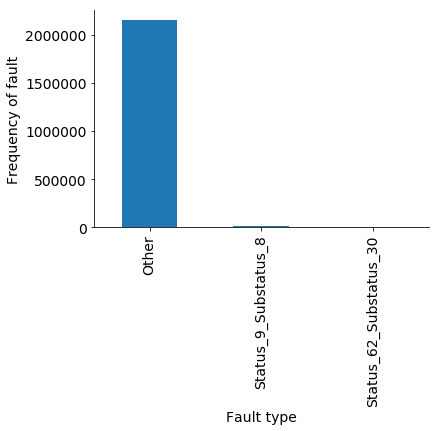

<Figure size 864x648 with 0 Axes>

In [127]:
for dataframe in list_of_wt_scada_data:
    print(dataframe['Status'].value_counts())
    plot_balance(dataframe,'Status',"Frequency of fault","Fault type")

# Building models

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# list_of_wt_scada_data[0].columns[1] = BESS-WTG01-WindVane (Average)
x = list_of_wt_scada_data[0].loc[:,list_of_wt_scada_data[0].columns[1]:list_of_wt_scada_data[0].columns[32]]
y = list_of_wt_scada_data[0][list_of_wt_scada_data[0].columns[33]]

X_train, X_test, y_train, y_test = train_test_split(
    x, 
    y, test_size=0.33, random_state=42,
    stratify = y
)



In [130]:
y_test.value_counts()

Other                     710774
Status_9_Substatus_8        3392
Status_62_Substatus_30         7
Name: Status, dtype: int64

In [131]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [132]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.9397470460079987
0.9400747437945708


In [133]:
'''
labels1 = list_of_wt_scada_data[0]["Status"].unique().tolist()
labelsrev = labels.reverse()
'''

'\nlabels1 = list_of_wt_scada_data[0]["Status"].unique().tolist()\nlabelsrev = labels.reverse()\n'

In [134]:
'''
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelsrev); ax.yaxis.set_ticklabels(labels);
'''

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt     \n\nax= plt.subplot()\nsns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells\n\n# labels, title and ticks\nax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); \nax.set_title('Confusion Matrix'); \nax.xaxis.set_ticklabels(labelsrev); ax.yaxis.set_ticklabels(labels);\n"

In [135]:
'''
import seaborn as sns

fig = plt.figure(figsize = (12,6))
sns.countplot(x='TimeStamp',data = removed_columns)
plt.show()
'''

"\nimport seaborn as sns\n\nfig = plt.figure(figsize = (12,6))\nsns.countplot(x='TimeStamp',data = removed_columns)\nplt.show()\n"

In [136]:
# https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [137]:
# High recall

In [138]:
import cmat

cm = cmat.ConfusionMatrix.create(
  # 1D arrray with ground truth labels
  y_true = y_test,
  # 2D array with predictions
  y_pred = y_test_pred,
  # (optional) List of values that might occur in y_true/y_pred
  # labels = list_of_wt_scada_data[0]["Status"].unique().tolist(),
  # (optional) List of names corresponding to labels
  #names = list_of_wt_scada_data[0]["Status"].unique().tolist()
)



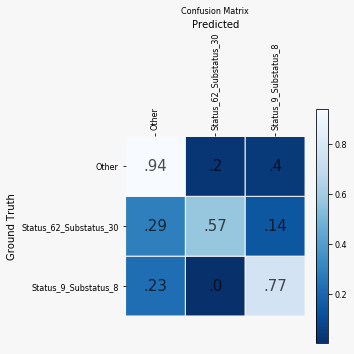

In [139]:
cm.normalize("recall").plot()

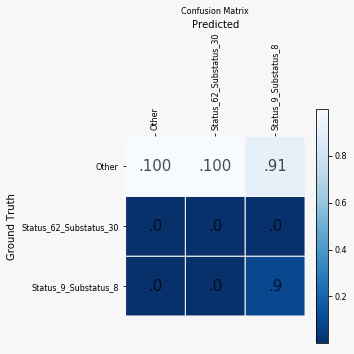

In [140]:
cm.normalize("precision").plot()

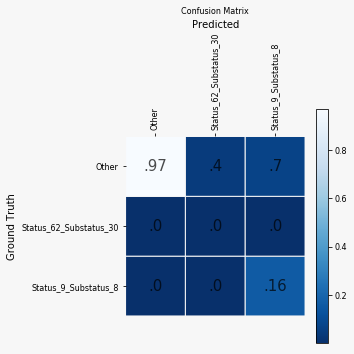

In [141]:
cm.normalize("f1score").plot()

In [142]:
cm.report

accuracy     0.940075
precision    0.362924
recall       0.759713
f1score      0.376700
iou          0.342477
dtype: float64

In [143]:
cm.class_report

,precision,recall,f1score,iou,frac_support,support
Other,0.998832,0.940905,0.969004,0.939871,0.995241,710774
Status_62_Substatus_30,0.000256,0.571429,0.000512,0.000256,0.000010,7
Status_9_Substatus_8,0.089683,0.766804,0.160585,0.087302,0.004750,3392


In [ ]:
# Av de vi predicted stus_62 på var 0.000256 riktig => Mange falske alarmer
# optuna
# sklearn gridsearch